In [69]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Loading data

In [70]:
hr_data=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

#### Analysing data

In [71]:
hr_data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [72]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [73]:
hr_data.shape

(1470, 35)

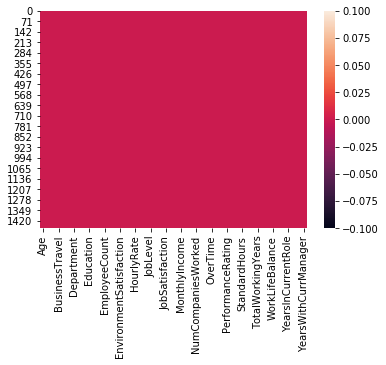

In [74]:
#checking for null values
import seaborn as sb
sb.heatmap(hr_data.isna())

No null values present

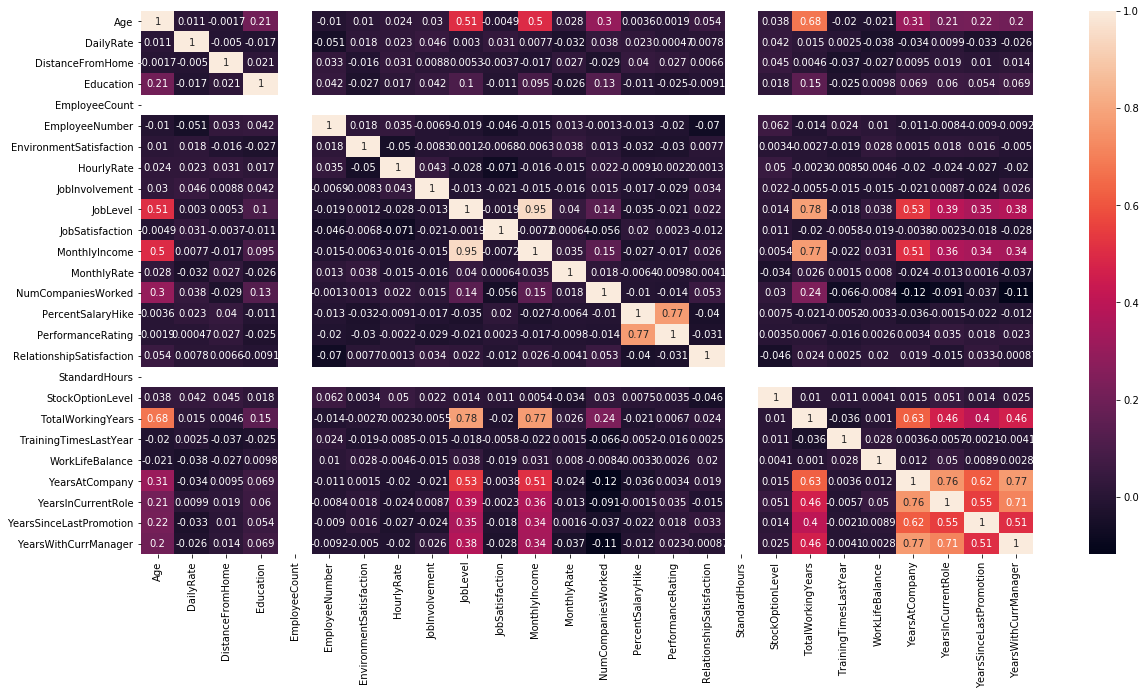

In [75]:
plt.figure(figsize=(20,10))
sb.heatmap(hr_data.corr(),annot=True)

We can observe that some columns have very HIGH MULTICOLLENEARITY ISSUE which may affect model accuracy.Hence removing one of the columns from each pair which is having multicollenearity issue.

In [76]:
# removing multicollinearity issue
HR_data=hr_data.copy()
colmns=['StandardHours','EmployeeCount','EmployeeNumber','TotalWorkingYears','JobLevel','YearsInCurrentRole','YearsWithCurrManager','PerformanceRating','YearsSinceLastPromotion']
HR_data.drop(colmns,axis=1,inplace=True)

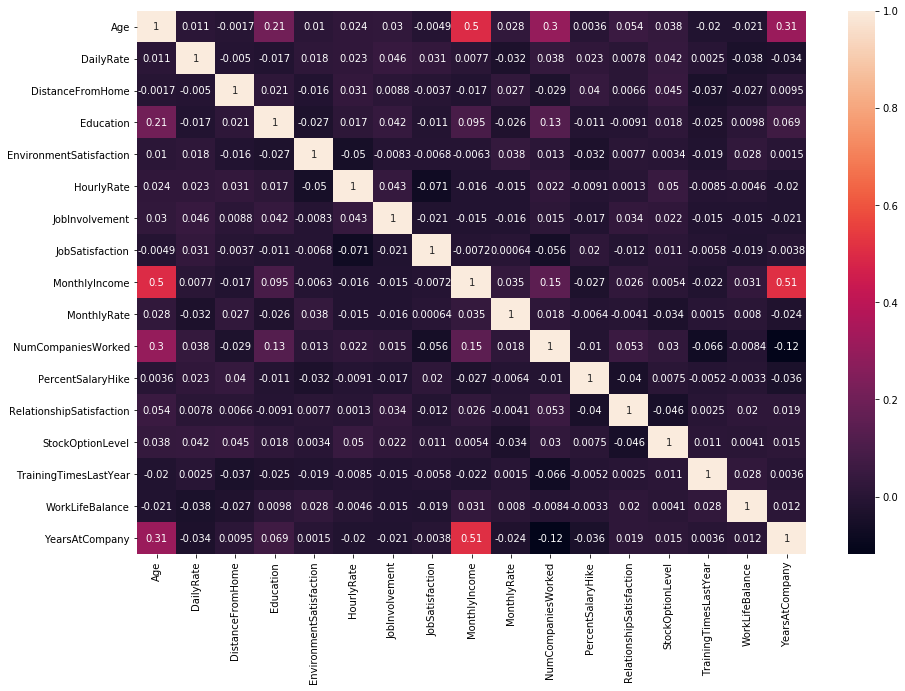

In [77]:
plt.figure(figsize=(15,10))
sb.heatmap(HR_data.corr(),annot=True)

Observation-- Multicollenearity issue removed and all columns now are almost independent

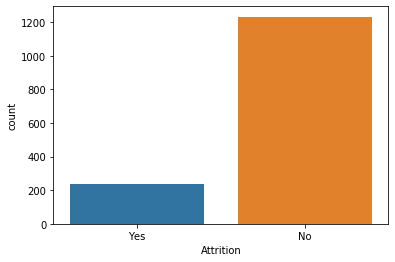

In [78]:
sb.countplot(x='Attrition',data=hr_data)

Approximately 20% attrition is observed

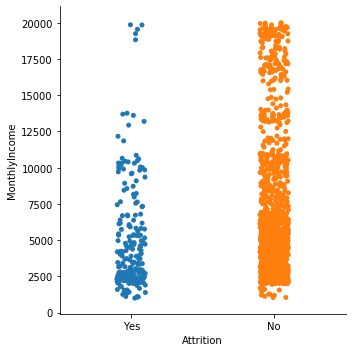

In [79]:
sb.catplot(x='Attrition',y='MonthlyIncome',data=hr_data)

Most Attrition is observed with employees having low monthly salary

In [80]:
hr_data['JobSatisfaction'].unique()

array([4, 2, 3, 1], dtype=int64)

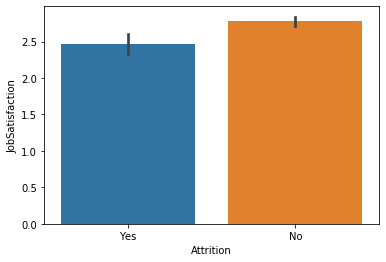

In [81]:
sb.barplot(x='Attrition',y='JobSatisfaction',data=hr_data)

All attrition happened with employees having job satisfaction lower than 2.5

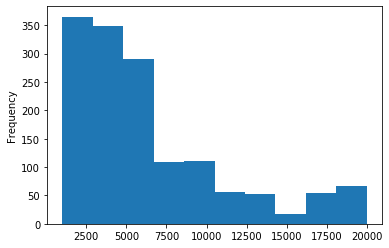

In [82]:
hr_data['MonthlyIncome'].plot.hist()

Monthly salary of most employees ranges from 2500 to 10000

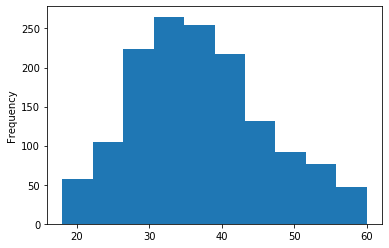

In [83]:
hr_data['Age'].plot(kind='hist')

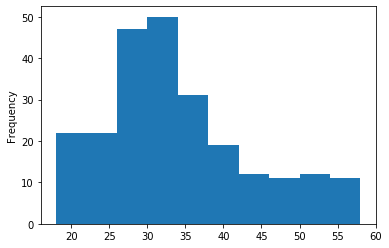

In [84]:
#cheking age distribution of employees who suffered attrition
hr_data[(hr_data['Attrition']=='Yes')]['Age'].plot.hist()

Most Attrition happened with employees in age range 20 to 40

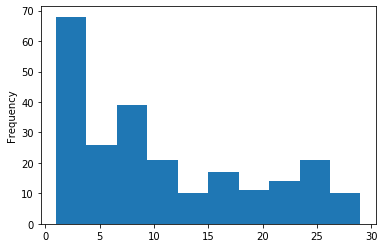

In [85]:
#cheking distance from home distribution of employees who suffered attrition
hr_data[(hr_data['Attrition']=='Yes')]['DistanceFromHome'].plot.hist()

In [86]:
#taking count of gender
HR_data.groupby('Gender').count()['Age']

Gender
Female    588
Male      882
Name: Age, dtype: int64

Ratio of Male is greater than Female

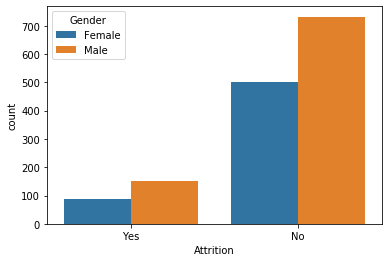

In [87]:
sb.countplot(x='Attrition',hue='Gender',data=HR_data)

Male attrition is higher but we conclude that Gender makes no impact on Attrition since Male ratio is higher than Female as seen in the count of Gender

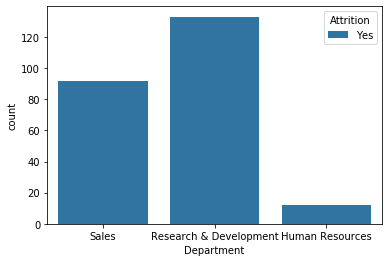

In [88]:
# checking if department has any impact on Attrition
sb.countplot(x='Department',hue='Attrition',data=hr_data[hr_data['Attrition']=='Yes'])

Highest Attrition is from R&D department and least is from HR department

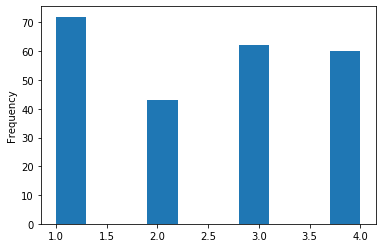

In [89]:
#chceking if EnvironmentSatisfaction makes any impact on Attrition
hr_data[(hr_data['Attrition']=='Yes')]['EnvironmentSatisfaction'].plot.hist()

Most Attrition happened with satisfaction level 1

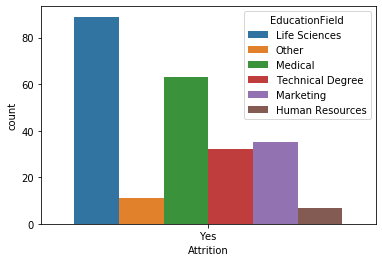

In [90]:
#checking impact of EducationField on Attrition
sb.countplot(x='Attrition',hue='EducationField',data=hr_data[hr_data['Attrition']=='Yes'])

Most Attrition happened from LS and Medical domain

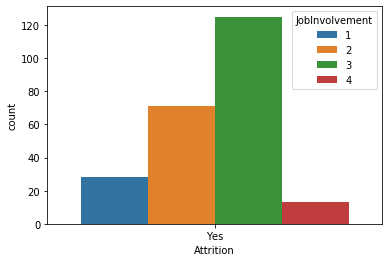

In [91]:
#checking impact of JobInvolvement on Attrition
sb.countplot(x='Attrition',hue='JobInvolvement',data=hr_data[hr_data['Attrition']=='Yes'])

Most Attrition happened with Jobinvolvement level 3

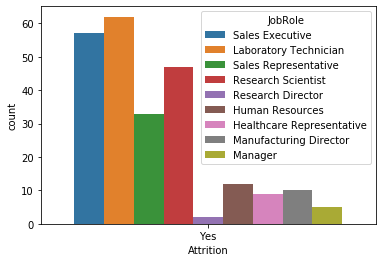

In [92]:
#checking impact of JobRole on Attrition
sb.countplot(x='Attrition',hue='JobRole',data=hr_data[hr_data['Attrition']=='Yes'])

Lab Technician,Sales executive,Research scientist were attrited most

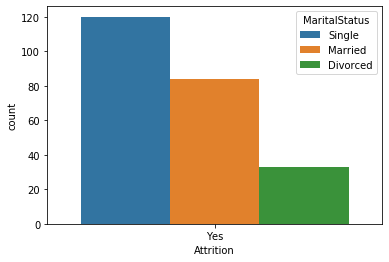

In [93]:
#checking impact of MaritalStatus on Attrition
sb.countplot(x='Attrition',hue='MaritalStatus',data=hr_data[hr_data['Attrition']=='Yes'])

Single employees contributed most in Attriton count

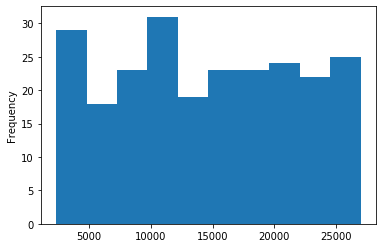

In [94]:
#cheking distance from home distribution of employees who suffered attrition
hr_data[(hr_data['Attrition']=='Yes')]['MonthlyRate'].plot.hist()

Monthly rate seems to have no impact on Attrition

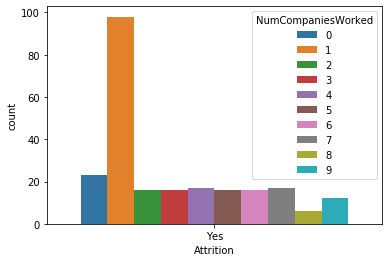

In [95]:
#checking impact of No of companies worked on Attrition
sb.countplot(x='Attrition',hue='NumCompaniesWorked',data=hr_data[hr_data['Attrition']=='Yes'])

Highest Attrition observed with employees who has left one company in past

In [96]:
#All emloyees are over 18 hence dropping this column
HR_data['Over18'].unique()

array(['Y'], dtype=object)

In [97]:
HR_data.drop(['Over18'],axis=1,inplace=True)

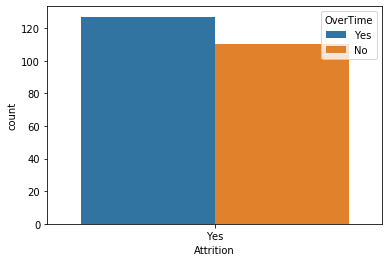

In [98]:
#checking impact of Overtime worked on Attrition
sb.countplot(x='Attrition',hue='OverTime',data=hr_data[hr_data['Attrition']=='Yes'])

OverTime seems less correlated to Attrition since both counts are almost same

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000011AE52BAB48>],
      dtype=object)

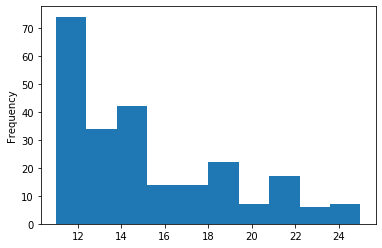

In [99]:
#cheking distribution of percentsalary hike
hr_data[(hr_data['Attrition']=='Yes')]['PercentSalaryHike'].plot.hist(subplots=True)

Employees with less salary hike (12 to 15) suffered mostly with Attrition

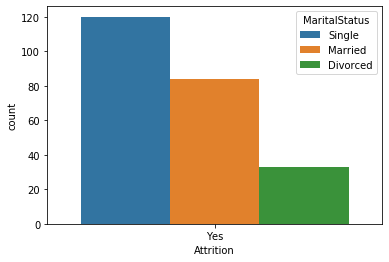

In [100]:
#checking impact of MaritalStatus worked on Attrition
sb.countplot(x='Attrition',hue='MaritalStatus',data=hr_data[hr_data['Attrition']=='Yes'])

Single employees contributes most in Attrition

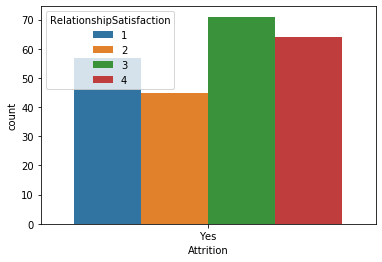

In [101]:
#checking impact of RelationshipSatisfaction worked on Attrition
sb.countplot(x='Attrition',hue='RelationshipSatisfaction',data=hr_data[hr_data['Attrition']=='Yes'])

Relationship satisfaction also seems to be less correlated with Attrition since all levels has enough attrition

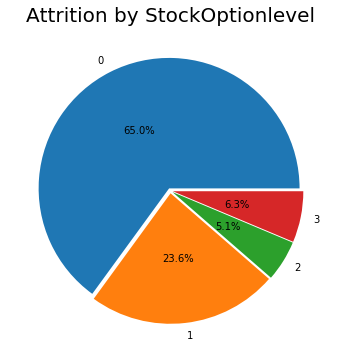

In [102]:
#checking impact of StockOptionLevel worked on Attrition
pie, ax = plt.subplots(figsize=[10,6])
labels =HR_data[HR_data['Attrition']=='Yes'].groupby('StockOptionLevel').count()['Age'].keys()
plt.pie(x=HR_data[HR_data['Attrition']=='Yes'].groupby('StockOptionLevel').count()['Age'], autopct="%.1f%%", explode=[0.02]*4, labels=labels, pctdistance=0.5)
plt.title("Attrition by StockOptionlevel", fontsize=20);

Stock option level 0 had highest attrition of 65%

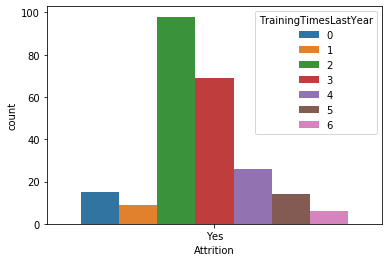

In [103]:
#checking impact of TrainingTimesLastYear worked on Attrition
sb.countplot(x='Attrition',hue='TrainingTimesLastYear',data=hr_data[hr_data['Attrition']=='Yes'])

most employess with TrainingTimesLastYear 2,3 suffered most Attrition

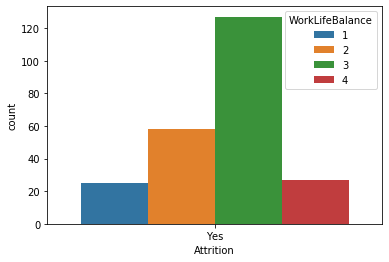

In [104]:
#checking impact of WorkLifeBalance worked on Attrition
sb.countplot(x='Attrition',hue='WorkLifeBalance',data=hr_data[hr_data['Attrition']=='Yes'])

Employees having Worklife Balance of 3 suffered most Attrition

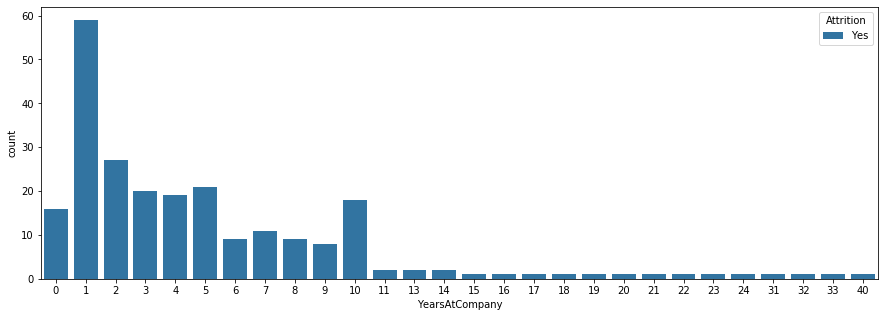

In [105]:
#checking impact of years stayed by employees on Attriton
plt.figure(figsize=(15,5))
sb.countplot(x='YearsAtCompany',hue='Attrition',data=hr_data[hr_data['Attrition']=='Yes'])

Most Atrrition happened with employees who worked for 1 and 2 years only

In [106]:
HR_data.drop(['RelationshipSatisfaction','OverTime'],inplace=True,axis=1)

In [107]:
HR_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   BusinessTravel           1470 non-null   object
 3   DailyRate                1470 non-null   int64 
 4   Department               1470 non-null   object
 5   DistanceFromHome         1470 non-null   int64 
 6   Education                1470 non-null   int64 
 7   EducationField           1470 non-null   object
 8   EnvironmentSatisfaction  1470 non-null   int64 
 9   Gender                   1470 non-null   object
 10  HourlyRate               1470 non-null   int64 
 11  JobInvolvement           1470 non-null   int64 
 12  JobRole                  1470 non-null   object
 13  JobSatisfaction          1470 non-null   int64 
 14  MaritalStatus            1470 non-null  

### Preprocessing the string data

In [108]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in ['Attrition','MonthlyRate','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus']:
    le.fit(HR_data[i])
    HR_data[i]=le.transform(HR_data[i])

### Dealing with Outliers:

In [109]:
from scipy.stats import zscore
z=abs(zscore(HR_data))
HRdata_no_outliers=HR_data[(z<3).all(axis=1)]
print(HR_data.shape)
print(HRdata_no_outliers.shape,'\n',HR_data.shape[0]-HRdata_no_outliers.shape[0],' rows removed as outliers')

(1470, 23)
(1445, 23) 
 25  rows removed as outliers


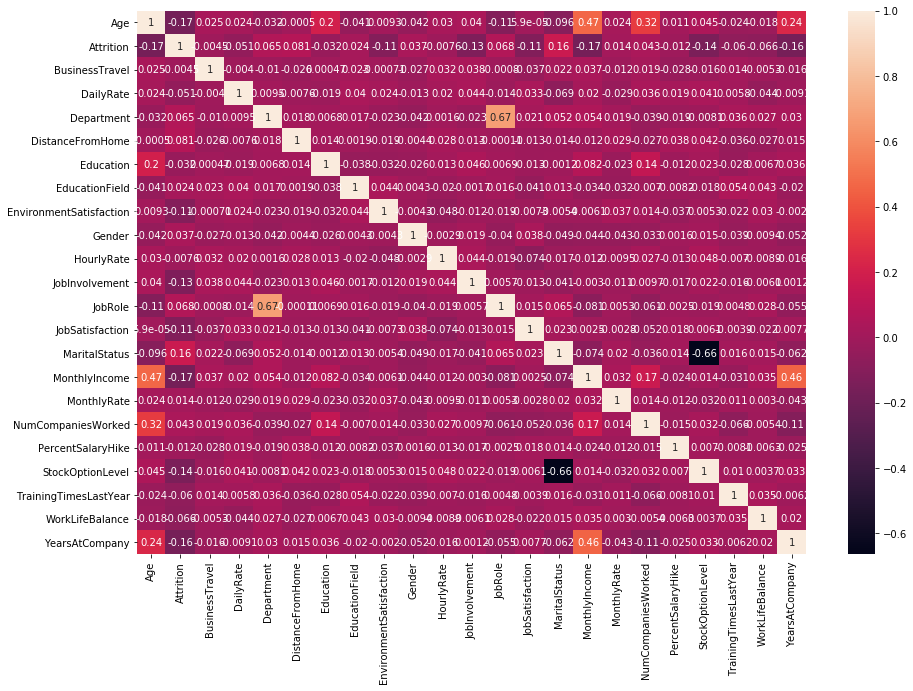

In [110]:
plt.figure(figsize=(15,10))
sb.heatmap(HRdata_no_outliers.corr(),annot=True)

In [111]:
HR_data.drop('JobRole',axis=1,inplace=True)

In [112]:
HR_data.skew()

Age                        0.413286
Attrition                  1.844366
BusinessTravel            -1.439006
DailyRate                 -0.003519
Department                 0.172231
DistanceFromHome           0.958118
Education                 -0.289681
EducationField             0.550371
EnvironmentSatisfaction   -0.321654
Gender                    -0.408665
HourlyRate                -0.032311
JobInvolvement            -0.498419
JobSatisfaction           -0.329672
MaritalStatus             -0.152175
MonthlyIncome              1.369817
MonthlyRate                0.012315
NumCompaniesWorked         1.026471
PercentSalaryHike          0.821128
StockOptionLevel           0.968980
TrainingTimesLastYear      0.553124
WorkLifeBalance           -0.552480
YearsAtCompany             1.764529
dtype: float64

In [113]:
HRdata_no_outliers.skew()

Age                        0.432706
Attrition                  1.844186
BusinessTravel            -1.438804
DailyRate                 -0.011501
Department                 0.179163
DistanceFromHome           0.956039
Education                 -0.293210
EducationField             0.550170
EnvironmentSatisfaction   -0.320300
Gender                    -0.402786
HourlyRate                -0.032636
JobInvolvement            -0.500871
JobRole                   -0.374534
JobSatisfaction           -0.334707
MaritalStatus             -0.155138
MonthlyIncome              1.427644
MonthlyRate                0.017769
NumCompaniesWorked         1.020254
PercentSalaryHike          0.815184
StockOptionLevel           0.964859
TrainingTimesLastYear      0.554107
WorkLifeBalance           -0.550504
YearsAtCompany             1.254208
dtype: float64

In [114]:
HRdata_no_outliers.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
count,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,...,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000
mean,36.663668,0.161246,1.607612,804.921107,1.260900,9.202768,2.903806,2.248443,2.721799,0.598616,...,2.732180,1.098962,6331.112111,708.050519,2.706574,15.222837,0.796540,2.795848,2.762630,6.587543
std,8.982306,0.367885,0.664971,403.685471,0.526737,8.096098,1.019759,1.334034,1.092078,0.490348,...,1.102551,0.730636,4538.402515,410.482200,2.500912,3.658391,0.856854,1.291024,0.705922,5.247884
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1009.000000,0.000000,0.000000,11.000000,0.000000,0.000000,1.000000,0.000000
25%,30.000000,0.000000,1.000000,467.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,2.000000,1.000000,2889.000000,354.000000,1.000000,12.000000,0.000000,2.000000,2.000000,3.000000
50%,35.000000,0.000000,2.000000,805.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,3.000000,1.000000,4859.000000,704.000000,2.000000,14.000000,1.000000,3.000000,3.000000,5.000000
75%,42.000000,0.000000,2.000000,1162.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,...,4.000000,2.000000,7945.000000,1062.000000,4.000000,18.000000,1.000000,3.000000,3.000000,9.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,2.000000,19973.000000,1426.000000,9.000000,25.000000,3.000000,6.000000,4.000000,25.000000


Age                           AxesSubplot(0.125,0.657941;0.0824468x0.222059)
Attrition                  AxesSubplot(0.223936,0.657941;0.0824468x0.222059)
BusinessTravel             AxesSubplot(0.322872,0.657941;0.0824468x0.222059)
DailyRate                  AxesSubplot(0.421809,0.657941;0.0824468x0.222059)
Department                 AxesSubplot(0.520745,0.657941;0.0824468x0.222059)
DistanceFromHome           AxesSubplot(0.619681,0.657941;0.0824468x0.222059)
Education                  AxesSubplot(0.718617,0.657941;0.0824468x0.222059)
EducationField             AxesSubplot(0.817553,0.657941;0.0824468x0.222059)
EnvironmentSatisfaction       AxesSubplot(0.125,0.391471;0.0824468x0.222059)
Gender                     AxesSubplot(0.223936,0.391471;0.0824468x0.222059)
HourlyRate                 AxesSubplot(0.322872,0.391471;0.0824468x0.222059)
JobInvolvement             AxesSubplot(0.421809,0.391471;0.0824468x0.222059)
JobRole                    AxesSubplot(0.520745,0.391471;0.0824468x0.222059)

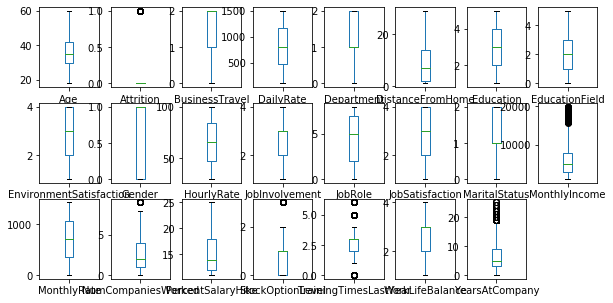

In [115]:
HRdata_no_outliers.plot(kind='box',subplots=True,layout=(3,8),figsize=(10,5))

### Dealing with skewness

In [116]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer
for i in HRdata_no_outliers.columns:
    if((abs(HRdata_no_outliers[i].skew())>0.55) & (i!='Attrition')):
        HRdata_no_outliers.loc[:,[i]]=PowerTransformer().fit_transform((HRdata_no_outliers.loc[:,[i]]))

In [117]:
HRdata_no_outliers.skew()

Age                        0.432706
Attrition                  1.844186
BusinessTravel            -0.969491
DailyRate                 -0.011501
Department                 0.179163
DistanceFromHome          -0.009098
Education                 -0.293210
EducationField            -0.008631
EnvironmentSatisfaction   -0.320300
Gender                    -0.402786
HourlyRate                -0.032636
JobInvolvement            -0.500871
JobRole                   -0.374534
JobSatisfaction           -0.334707
MaritalStatus             -0.155138
MonthlyIncome              0.031094
MonthlyRate                0.017769
NumCompaniesWorked         0.013525
PercentSalaryHike          0.115520
StockOptionLevel           0.089257
TrainingTimesLastYear      0.058465
WorkLifeBalance           -0.011882
YearsAtCompany            -0.021967
dtype: float64

Most Skewness is handled 

### Scaling the data

In [118]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler  
X_mmscaled=MinMaxScaler().fit_transform(HRdata_no_outliers.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]])
X_sscaled=StandardScaler().fit_transform(HRdata_no_outliers.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]])
Y=HRdata_no_outliers.iloc[:,1]
x=HRdata_no_outliers.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]]
y=HRdata_no_outliers.iloc[:,1]

### Model Preparation:

In [119]:
# importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
import warnings
warnings.filterwarnings('ignore')

In [120]:
# preparing a method to get metrices at best random state
def classification_bestrandomstate(x,y,test_size,model):
    max=0
    ind=0
    for i in range(0,100):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=test_size,random_state=i,stratify=y)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
        if(max < accuracy_score(test_y,pred)):
                max=accuracy_score(test_y,pred)
                ind=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=test_size,random_state=ind,stratify=y)
    model.fit(train_x,train_y)
    pred=model.predict(test_x)
    print('Best Accuracy score :\n',accuracy_score(test_y,pred),'at random state',ind)
    print('\nclassification_report :\n',classification_report(test_y,pred))
    false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y,pred)
    roc_auc=auc( false_positive_rate,true_positive_rate)
    print('\nroc_auc_score :\n',roc_auc)
    acc_score.append(accuracy_score(test_y,pred))
    roc_score.append(roc_auc)
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(model)
    print(sb.heatmap(confusion_matrix(test_y,pred),annot=True))
    plt.subplot(912)
    plt.title('roc_auc')
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend('lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print('\n\n')

$$$$$$$$$$$$$$$ LogisticRegression $$$$$$$$$$$$$$
Best Accuracy score :
 0.8788927335640139 at random state 54

classification_report :
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       242
           1       0.88      0.30      0.44        47

    accuracy                           0.88       289
   macro avg       0.88      0.64      0.69       289
weighted avg       0.88      0.88      0.85       289


roc_auc_score :
 0.6448039388078073
AxesSubplot(0.125,0.808774;0.62x0.0712264)



$$$$$$$$$$$$$$$ KNeighbor $$$$$$$$$$$$$$
Best Accuracy score :
 0.8512110726643599 at random state 44

classification_report :
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       242
           1       0.83      0.11      0.19        47

    accuracy                           0.85       289
   macro avg       0.84      0.55      0.55       289
weighted avg       0.85      0.85      0.80       289

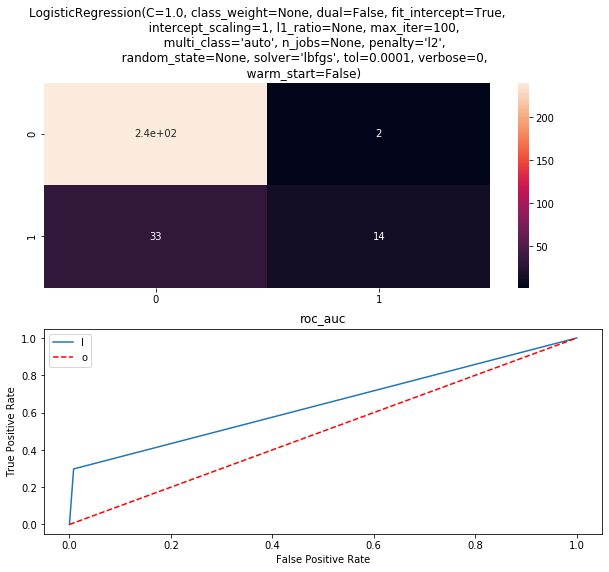

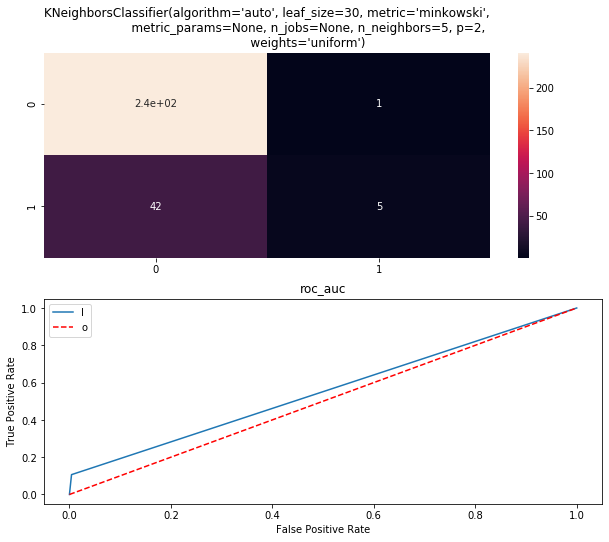

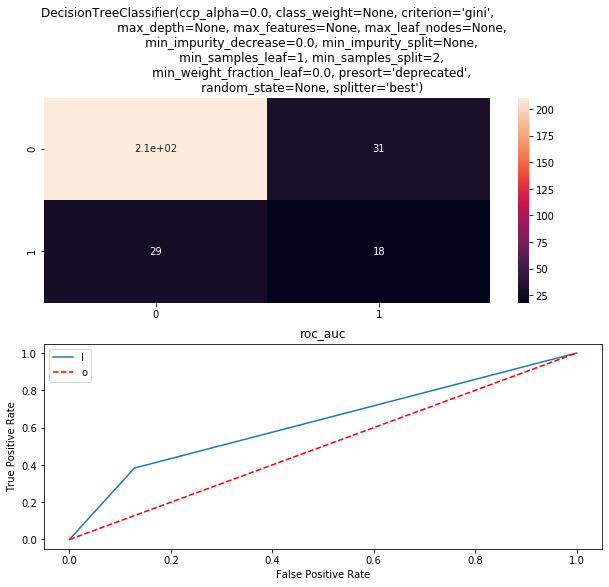

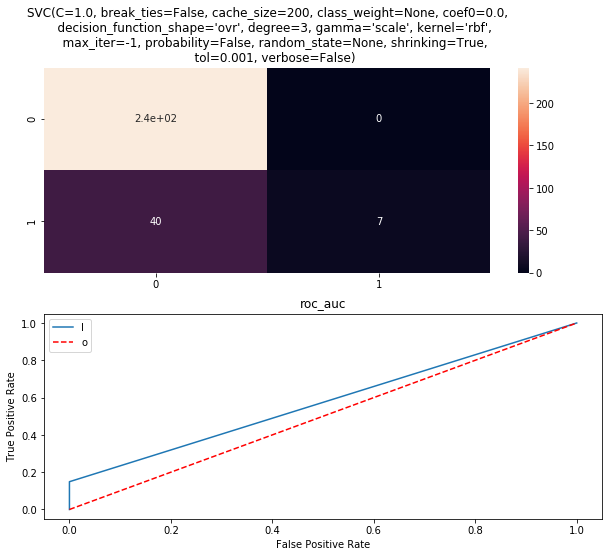

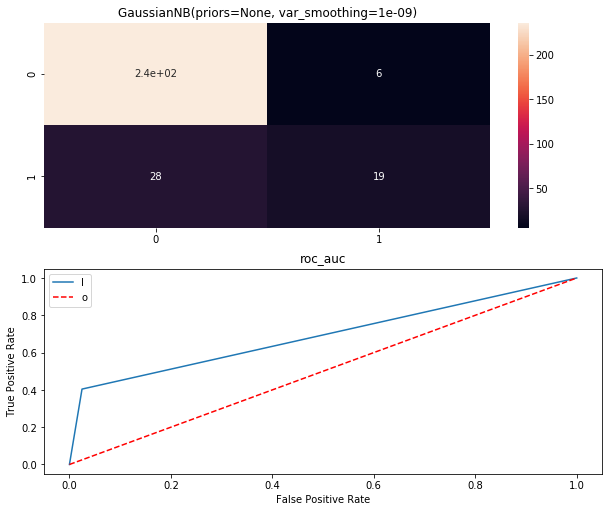

In [121]:
acc_score=[]
roc_score=[]
models=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),SVC(),GaussianNB()]
for i,k in zip(models,['LogisticRegression','KNeighbor','DecisionTree','SVC','GaussianNB']):
    print('$$$$$$$$$$$$$$$',k,'$$$$$$$$$$$$$$')
    classification_bestrandomstate(X_sscaled,Y,0.2,i)
    

In [122]:
pd.DataFrame([acc_score,roc_score],index=['Accuracy_score','Auc_roc_score'],columns=['LogisticRegression','KNeighbor','DecisionTree','SVC','GaussianNB'])

,LogisticRegression,KNeighbor,DecisionTree,SVC,GaussianNB
Accuracy_score,0.878893,0.851211,0.792388,0.861592,0.882353
Auc_roc_score,0.644804,0.551125,0.627440,0.574468,0.689731


In [123]:
hr_data.groupby('Attrition').count()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,...,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233
Yes,237,237,237,237,237,237,237,237,237,237,...,237,237,237,237,237,237,237,237,237,237


### Here we can see that Attrition -1(yes) is less in number than Not Atrrition - 0(No) which concludes that dataset is imbalanced which means we should not go with evaluation metric 'Accuracy score' instead work on precision and recall 

### Problem --  Attrition and factors causing it 

### conclusion from problem:-

### -->Recall should be as high as possible which means False negative should be as low as possible not disturbing the precision

### --> Means the number of times our model predict as 'Not Attrition' when there is actually Attrition should be low

### Considering all above points LogisticRegression is performing best

In [124]:
#checking cross val score:
cross_val_score(LogisticRegression(),X_sscaled,Y,cv=5,scoring='f1_macro').mean()

0.6323659266673509

Logistic Regression is not overfitted / underfitted

### Trying Ensemble techniques:

In [125]:
#preparing a method to perform hyperparameter tuning and cross validation :
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
def gridsearch(x,y,model,parameter_dictionary):
    #kfold=model_selection.KFold(n_splits=10,random_state=rs,shuffle=True)
    scoring=['accuracy','roc_auc','average_precision','f1_macro']
    for i in scoring:
        grid_cv=GridSearchCV(estimator=model,param_grid=parameter_dictionary,cv=5,scoring=i)
        grid_cv.fit(x,y)
        if(i=='accuracy'):
            print('\n')   
            print('mean accuracy_score :',grid_cv.best_score_)
            #cv_r2score.append(grid_cv.best_score_)
            print('best Parameter :',grid_cv.best_params_)
        if(i=='roc_auc'):
            print('\n')   
            print('mean roc_auc :',grid_cv.best_score_)
            #cv_r2score.append(grid_cv.best_score_)
            print('best Parameter :',grid_cv.best_params_)
        if(i=='precision'):
            print('\n')
            print('mean precision_score:',grid_cv.best_score_)
            print('best Parameter :',grid_cv.best_params_)
        if(i=='recall'):
            print('\n')
            print('mean precision_score:',grid_cv.best_score_)
            print('best Parameter :',grid_cv.best_params_)
        if(i=='f1_macro'):
            print('\n')
            print('macro avg f1_score:',grid_cv.best_score_)
            print('best Parameter :',grid_cv.best_params_)

In [126]:
gridsearch(X_sscaled,Y,RandomForestClassifier(),{'n_estimators': [50,100,150,200],'criterion':['gini','entropy']})



mean accuracy_score : 0.8512110726643598
best Parameter : {'criterion': 'gini', 'n_estimators': 150}


mean roc_auc : 0.7613189331715949
best Parameter : {'criterion': 'gini', 'n_estimators': 150}


macro avg f1_score: 0.563014233545829
best Parameter : {'criterion': 'gini', 'n_estimators': 150}


In [127]:
gridsearch(X_sscaled,Y,AdaBoostClassifier(base_estimator=LogisticRegression()),{'n_estimators': [50,100,150,200]})



mean accuracy_score : 0.855363321799308
best Parameter : {'n_estimators': 100}


mean roc_auc : 0.7698403817214496
best Parameter : {'n_estimators': 50}


macro avg f1_score: 0.6298367991959181
best Parameter : {'n_estimators': 100}


In [128]:
gridsearch(X_mmscaled,Y,GradientBoostingClassifier(),{'n_estimators': [50,100,150,200]})



mean accuracy_score : 0.8519031141868512
best Parameter : {'n_estimators': 150}


mean roc_auc : 0.7562942267433993
best Parameter : {'n_estimators': 100}


macro avg f1_score: 0.6398677070764621
best Parameter : {'n_estimators': 200}


### Observation: GradientBoostingClassifier is working well in all ensemble technique with mean F1_score of 37%

Best Accuracy score :
 0.8754325259515571 at random state 78

classification_report :
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       242
           1       0.76      0.34      0.47        47

    accuracy                           0.88       289
   macro avg       0.82      0.66      0.70       289
weighted avg       0.86      0.88      0.85       289


roc_auc_score :
 0.6598821874450501
AxesSubplot(0.125,0.808774;0.62x0.0712264)





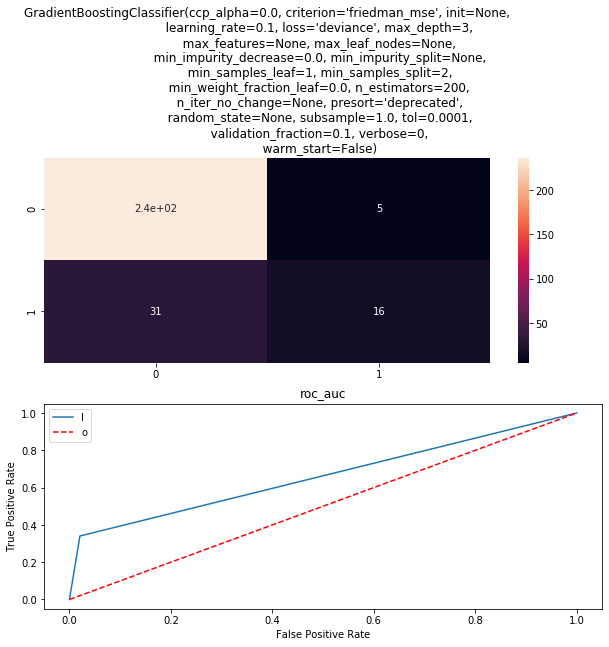

In [129]:
#finding best state for GradientBoosting classifier
classification_bestrandomstate(X_sscaled,Y,0.2,GradientBoostingClassifier(n_estimators=200))

## Finalizing the model:

In [130]:
from sklearn.metrics import f1_score
model=GradientBoostingClassifier(n_estimators=200)
train_x,test_x,train_y,test_y=train_test_split(X_sscaled,Y,test_size=0.2,random_state=64,stratify=Y)
model.fit(train_x,train_y)
pred=model.predict(test_x)
print('\nclassification_report :\n',classification_report(test_y,pred))
print(model.feature_importances_)
print(model.n_features_)


classification_report :
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       242
           1       0.73      0.40      0.52        47

    accuracy                           0.88       289
   macro avg       0.81      0.69      0.73       289
weighted avg       0.87      0.88      0.86       289

[0.08859551 0.02778977 0.06311139 0.00167539 0.04697644 0.00449472
 0.01936494 0.03238663 0.00340251 0.05640467 0.03981709 0.04926133
 0.04250846 0.02890735 0.18108088 0.07723636 0.03687956 0.02380818
 0.05427697 0.03613101 0.04066993 0.0452209 ]
22


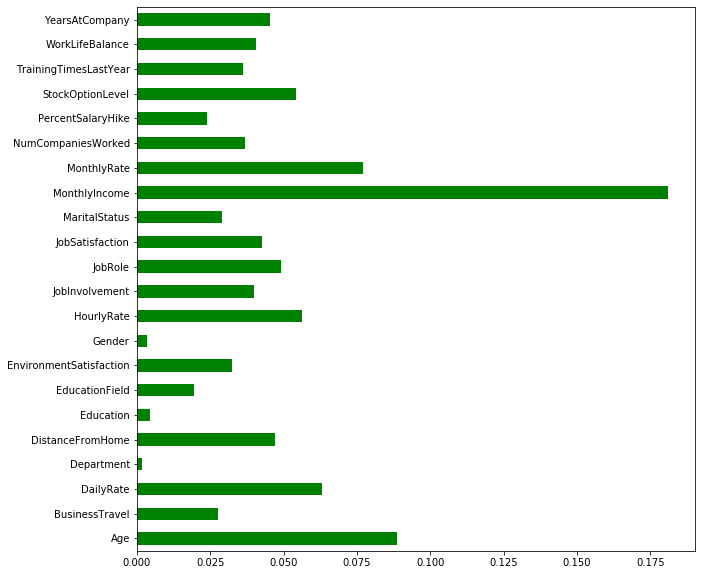

In [131]:
#checking importances of each feature in Attrition as per model
plt.figure(figsize=(10,10))
series=pd.Series(model.feature_importances_, index=HRdata_no_outliers.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]].columns)
series.plot(kind='barh',color='green')

### Observation: Monthly income is most important factor in Attrition followed by Age

In [132]:
from sklearn.externals import joblib
joblib.dump(model,'model_HRAnalytics')

['model_HRAnalytics']